In [1]:
### query on Uniprote site for:
# * fructokinase
# * escherichia coli (without any specification)
# * reviewed

# a) site search in https://www.uniprot.org/ 
#   (pay attantion to search field and URL field)

# b) search for "Uniprot API" syntax
#    -- REST is a principle of data transmission
#    -- retrieving entries via queries

# try to put into URL filed in your browser
# https://www.uniprot.org/uniprot/?query="fructokinase"+AND+organism:"escherichia coli"+AND+reviewed:yes
# https://www.uniprot.org/uniprot/?query="fructokinase"+AND+organism:"escherichia coli"+AND+reviewed:yes+AND+format=list

In [1]:
URL = 'https://www.uniprot.org/uniprot/?' \
      'query="fructokinase"' \
      '+AND+organism:"escherichia coli"' \
      '+AND+reviewed:yes' \
      '&format=txt' # list, json, txt, tab, xml, json, fasta

In [2]:
URL

'https://www.uniprot.org/uniprot/?query="fructokinase"+AND+organism:"escherichia coli"+AND+reviewed:yes&format=txt'

In [3]:
import requests

In [4]:
result = requests.get(URL)

In [5]:
result # The HTTP 200 OK success status response code indicates that the request has succeeded. 

<Response [200]>

In [6]:
result.ok

True

In [7]:
result.text

'ID   MAK_ECOLI               Reviewed;         302 AA.\nAC   P23917; P71316; P75705; Q2MC31;\nDT   01-MAR-1992, integrated into UniProtKB/Swiss-Prot.\nDT   01-JUN-1994, sequence version 2.\nDT   10-FEB-2021, entry version 137.\nDE   RecName: Full=Fructokinase;\nDE            EC=2.7.1.4;\nDE   AltName: Full=D-fructose kinase;\nDE   AltName: Full=Manno(fructo)kinase;\nGN   Name=mak; Synonyms=yajF; OrderedLocusNames=b0394, JW0385;\nOS   Escherichia coli (strain K12).\nOC   Bacteria; Proteobacteria; Gammaproteobacteria; Enterobacterales;\nOC   Enterobacteriaceae; Escherichia.\nOX   NCBI_TaxID=83333;\nRN   [1]\nRP   NUCLEOTIDE SEQUENCE [GENOMIC DNA].\nRC   STRAIN=K12;\nRX   PubMed=8807285;\nRA   Ryder L., Sharples G.J., Lloyd R.G.;\nRT   "Recombination-dependent growth in exonuclease-depleted recBC sbcBC strains\nRT   of Escherichia coli K-12.";\nRL   Genetics 143:1101-1114(1996).\nRN   [2]\nRP   NUCLEOTIDE SEQUENCE [LARGE SCALE GENOMIC DNA].\nRC   STRAIN=K12 / MG1655 / ATCC 47076;\nRA   C

In [9]:
if result.ok:
#   print(result.text)
    print("==")
    print(result.headers)
else:
    print('Something went wrong ', result.status_code)

==
{'Vary': 'User-Agent, Accept-Encoding', 'X-Hosted-By': 'European Bioinformatics Institute', 'Cache-Control': 'public', 'Content-Type': 'text/plain;charset=UTF-8', 'Content-Encoding': 'gzip', 'Access-Control-Expose-Headers': 'X-Total-Results, X-Release', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'Date': 'Tue, 20 Apr 2021 07:56:48 GMT', 'X-UniProt-Release': '2021_02', 'Expires': 'Tue, 20 Apr 2021 08:56:48 GMT', 'X-Total-Results': '2', 'Transfer-Encoding': 'chunked', 'Access-Control-Allow-Origin': '*', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'SAMEORIGIN', 'Last-Modified': 'Wed, 07 Oct 2020 00:00:00 GMT', 'Access-Control-Allow-Headers': 'X-Total-Results, X-UniProt-Release'}


In [10]:
for key, value in result.headers.items():
    print('ITEM {}: {}'.format(key, value))

ITEM Vary: User-Agent, Accept-Encoding
ITEM X-Hosted-By: European Bioinformatics Institute
ITEM Cache-Control: public
ITEM Content-Type: text/plain;charset=UTF-8
ITEM Content-Encoding: gzip
ITEM Access-Control-Expose-Headers: X-Total-Results, X-Release
ITEM Strict-Transport-Security: max-age=31536000; includeSubDomains
ITEM Date: Tue, 20 Apr 2021 07:56:48 GMT
ITEM X-UniProt-Release: 2021_02
ITEM Expires: Tue, 20 Apr 2021 08:56:48 GMT
ITEM X-Total-Results: 2
ITEM Transfer-Encoding: chunked
ITEM Access-Control-Allow-Origin: *
ITEM X-Content-Type-Options: nosniff
ITEM X-Frame-Options: SAMEORIGIN
ITEM Last-Modified: Wed, 07 Oct 2020 00:00:00 GMT
ITEM Access-Control-Allow-Headers: X-Total-Results, X-UniProt-Release


In [18]:
URL = 'https://www.uniprot.org/uniprot/?' \
      'query="fructokinase"' \
      '+AND+organism:"escherichia coli"' \
      '+AND+reviewed:yes' \
      '&format=list' # txt, list, tab, xml, fasta, json

In [34]:
database = 'http://www.uniprot.org'
endpoint = '/uniprot/' # Knowledgebase
params = {'query': '"fructokinase"+AND+organism:"escherichia coli"+AND+reviewed:Yes', # try typo
           'format': 'list'}
           #'columns': 'id,entry_name,ec,chebi-id'
result = requests.get(database + endpoint, params=params)

In [30]:
result

<Response [200]>

In [31]:
if result.ok:
    print(result.text)
else:
    print('Something went wrong ', result.status_code)

P23917
P40713



In [32]:
result.text

'P23917\nP40713\n'

In [33]:
# try other formats: fasta (ACTUALLY, THAT WAS OUR TASK), xml, ..

In [35]:
# import xml.etree.ElementTree as ET
# from bs4 import BeautifulSoup
import xmltodict
result = xmltodict.parse(result.text)
result

OrderedDict([('uniprot',
              OrderedDict([('@xmlns', 'http://uniprot.org/uniprot'),
                           ('@xmlns:xsi',
                            'http://www.w3.org/2001/XMLSchema-instance'),
                           ('@xsi:schemaLocation',
                            'http://uniprot.org/uniprot http://www.uniprot.org/support/docs/uniprot.xsd'),
                           ('entry',
                            [OrderedDict([('@dataset', 'Swiss-Prot'),
                                          ('@created', '1992-03-01'),
                                          ('@modified', '2021-02-10'),
                                          ('@version', '137'),
                                          ('accession',
                                           ['P23917',
                                            'P71316',
                                            'P75705',
                                            'Q2MC31']),
                                          ('nam

In [39]:
result["uniprot"]["entry"]

[OrderedDict([('@dataset', 'Swiss-Prot'),
              ('@created', '1992-03-01'),
              ('@modified', '2021-02-10'),
              ('@version', '137'),
              ('accession', ['P23917', 'P71316', 'P75705', 'Q2MC31']),
              ('name', 'MAK_ECOLI'),
              ('protein',
               OrderedDict([('recommendedName',
                             OrderedDict([('fullName', 'Fructokinase'),
                                          ('ecNumber', '2.7.1.4')])),
                            ('alternativeName',
                             [OrderedDict([('fullName', 'D-fructose kinase')]),
                              OrderedDict([('fullName',
                                            'Manno(fructo)kinase')])])])),
              ('gene',
               OrderedDict([('name',
                             [OrderedDict([('@type', 'primary'),
                                           ('#text', 'mak')]),
                              OrderedDict([('@type', 'synonym'),
  

In [38]:
result["uniprot"]["entry"]["protein"]

TypeError: list indices must be integers or slices, not str

In [40]:
result["uniprot"]["entry"][1]

OrderedDict([('@dataset', 'Swiss-Prot'),
             ('@created', '1995-02-01'),
             ('@modified', '2020-08-12'),
             ('@version', '74'),
             ('accession', 'P40713'),
             ('name', 'SCRK_ECOLX'),
             ('protein',
              OrderedDict([('recommendedName',
                            OrderedDict([('fullName', 'Fructokinase'),
                                         ('ecNumber', '2.7.1.4')]))])),
             ('gene',
              OrderedDict([('name',
                            OrderedDict([('@type', 'primary'),
                                         ('#text', 'cscK')]))])),
             ('organism',
              OrderedDict([('name',
                            OrderedDict([('@type', 'scientific'),
                                         ('#text', 'Escherichia coli')])),
                           ('dbReference',
                            OrderedDict([('@type', 'NCBI Taxonomy'),
                                         ('@id', '5

In [46]:
temp_var = result["uniprot"]["entry"][1]

In [44]:
type(temp_var) # try without [1]

collections.OrderedDict

In [50]:
temp_var["sequence"]

OrderedDict([('@length', '307'),
             ('@mass', '33393'),
             ('@checksum', 'AFA2327035956993'),
             ('@modified', '2002-06-20'),
             ('@version', '2'),
             ('#text',
              'MSAKVWVLGDAVVDLLPESDGRLLPCPGGAPANVAVGIARLGGTSGFIGRVGDDPFGALMQRTLLTEGVDITYLKQDEWHRTSTVLVDLNDQGERSFTFMVRPSADLFLETTDLPCWRHGEWLHLCSIALSAEPSRTSAFTAMTAIRHAGGFVSFDPNIREDLWQDEHLLRLCLRQALQLADVVKLSEEEWRLISGKTQNDRDICALAKEYEIAMLLVTKGAEGVVVCYRGQVHHFAGMSVNCVDSTGAGDAFVAGLLTGLSSTGLSTDEREMRRIIDLAQRCGALAVTAKGAMTALPCRQELESEK')])

In [51]:
temp_var["sequence"]["#text"]

'MSAKVWVLGDAVVDLLPESDGRLLPCPGGAPANVAVGIARLGGTSGFIGRVGDDPFGALMQRTLLTEGVDITYLKQDEWHRTSTVLVDLNDQGERSFTFMVRPSADLFLETTDLPCWRHGEWLHLCSIALSAEPSRTSAFTAMTAIRHAGGFVSFDPNIREDLWQDEHLLRLCLRQALQLADVVKLSEEEWRLISGKTQNDRDICALAKEYEIAMLLVTKGAEGVVVCYRGQVHHFAGMSVNCVDSTGAGDAFVAGLLTGLSSTGLSTDEREMRRIIDLAQRCGALAVTAKGAMTALPCRQELESEK'

In [52]:
result["uniprot"]["entry"][1]["protein"]["recommendedName"]["ecNumber"]

'2.7.1.4'

In [53]:
# ----------------------------------
# urllib (standard library, goes by default with python), urllib2, urllib3 and requests
# also don't forget about curl command in terminal

# EXAMPLE FROM https://www.uniprot.org/help/api_idmapping

import urllib.parse
import urllib.request

url = 'https://www.uniprot.org/uploadlists/'

params = {
'from': 'ACC+ID',
'to': 'ENSEMBL_ID',
'format': 'tab',
'query': 'P40925 P40926 O43175 Q9UM73 P97793'
}

data = urllib.parse.urlencode(params)
data = data.encode('utf-8')

req = urllib.request.Request(url, data)

with urllib.request.urlopen(req) as f:
    response = f.read()
print(response.decode('utf-8'))

From	To
P40925	ENSG00000014641
P40926	ENSG00000146701
O43175	ENSG00000092621
Q9UM73	ENSG00000171094
P97793	ENSMUSG00000055471



In [ ]:
# --------------------------------------------------------

In [54]:
import requests

In [64]:
# covid19api.com
# response = requests.get("https://api.covid19api.com/summary").text
# response
response = requests.get("https://api.covid19api.com/summary").json()

In [59]:
# requests.get("https://api.covid19api.com/summary").json()

In [65]:
response

{'ID': '3fdac0cd-eb56-474d-bb78-94f0258181df',
 'Message': '',
 'Global': {'NewConfirmed': 446762,
  'TotalConfirmed': 141208849,
  'NewDeaths': 5367,
  'TotalDeaths': 3017063,
  'NewRecovered': 306178,
  'TotalRecovered': 80753030,
  'Date': '2021-04-19T23:10:50.74Z'},
 'Countries': [{'ID': '0e638cf3-0c44-4392-a274-ee13a325feef',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 57793,
   'NewDeaths': 0,
   'TotalDeaths': 2539,
   'NewRecovered': 0,
   'TotalRecovered': 52168,
   'Date': '2021-04-19T23:10:50.74Z',
   'Premium': {}},
  {'ID': 'b0a168ba-929e-4d97-9d41-d39a598a2f85',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 0,
   'TotalConfirmed': 129594,
   'NewDeaths': 0,
   'TotalDeaths': 2342,
   'NewRecovered': 0,
   'TotalRecovered': 101584,
   'Date': '2021-04-19T23:10:50.74Z',
   'Premium': {}},
  {'ID': '2f6543cc-7fa1-48be-a631-c4f6fe95c6bd',
   'Country': 'Al

In [69]:
type(response)

dict

In [71]:
# pip install
from print_schema import print_schema

In [72]:
print_schema(response)

|- ID	 - <class 'str'>
|- Message	 - <class 'str'>
|- Global	 - <class 'dict'>
    |- NewConfirmed	 - <class 'int'>
    |- TotalConfirmed	 - <class 'int'>
    |- NewDeaths	 - <class 'int'>
    |- TotalDeaths	 - <class 'int'>
    |- NewRecovered	 - <class 'int'>
    |- TotalRecovered	 - <class 'int'>
    |- Date	 - <class 'str'>
|- Countries	 - list [190] <class 'dict'>
    |- ID	 - <class 'str'>
    |- Country	 - <class 'str'>
    |- CountryCode	 - <class 'str'>
    |- Slug	 - <class 'str'>
    |- NewConfirmed	 - <class 'int'>
    |- TotalConfirmed	 - <class 'int'>
    |- NewDeaths	 - <class 'int'>
    |- TotalDeaths	 - <class 'int'>
    |- NewRecovered	 - <class 'int'>
    |- TotalRecovered	 - <class 'int'>
    |- Date	 - <class 'str'>
    |- Premium	 - <class 'dict'>
|- Date	 - <class 'str'>


In [73]:
response['Countries']

[{'ID': '0e638cf3-0c44-4392-a274-ee13a325feef',
  'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Slug': 'afghanistan',
  'NewConfirmed': 0,
  'TotalConfirmed': 57793,
  'NewDeaths': 0,
  'TotalDeaths': 2539,
  'NewRecovered': 0,
  'TotalRecovered': 52168,
  'Date': '2021-04-19T23:10:50.74Z',
  'Premium': {}},
 {'ID': 'b0a168ba-929e-4d97-9d41-d39a598a2f85',
  'Country': 'Albania',
  'CountryCode': 'AL',
  'Slug': 'albania',
  'NewConfirmed': 0,
  'TotalConfirmed': 129594,
  'NewDeaths': 0,
  'TotalDeaths': 2342,
  'NewRecovered': 0,
  'TotalRecovered': 101584,
  'Date': '2021-04-19T23:10:50.74Z',
  'Premium': {}},
 {'ID': '2f6543cc-7fa1-48be-a631-c4f6fe95c6bd',
  'Country': 'Algeria',
  'CountryCode': 'DZ',
  'Slug': 'algeria',
  'NewConfirmed': 0,
  'TotalConfirmed': 119642,
  'NewDeaths': 0,
  'TotalDeaths': 3155,
  'NewRecovered': 0,
  'TotalRecovered': 83397,
  'Date': '2021-04-19T23:10:50.74Z',
  'Premium': {}},
 {'ID': 'c4dd1671-6885-4629-98e6-42a614325eb1',
  'Country': 'And

In [74]:
country_list = []
for country_info in response["Countries"]:
    country_list.append([country_info["Country"], country_info["TotalConfirmed"]])

In [75]:
import pandas as pd

In [76]:
country_df = pd.DataFrame(data=country_list, columns=["Country", "Total_Confirmed"])

In [77]:
country_df.head(10)

,Country,Total_Confirmed
0,Afghanistan,57793
1,Albania,129594
2,Algeria,119642
3,Andorra,12805
4,Angola,24389
5,Antigua and Barbuda,1216
6,Argentina,2694014
7,Armenia,208520
8,Australia,29533
9,Austria,593423


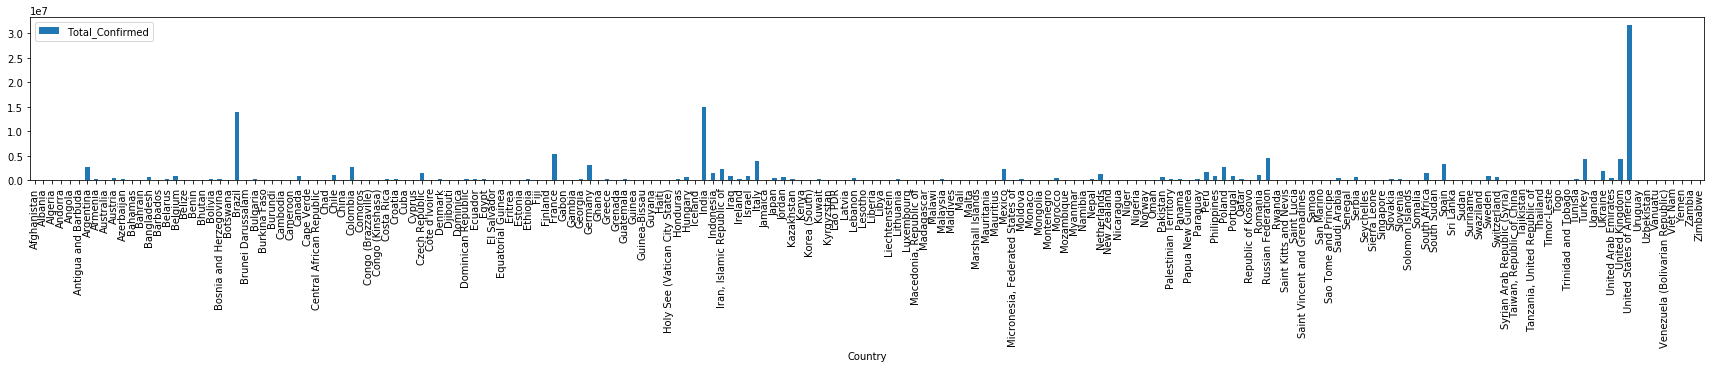

In [78]:
country_df.plot.bar(x='Country', y='Total_Confirmed', rot=90, figsize=(30,3))